In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "./train.csv"
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


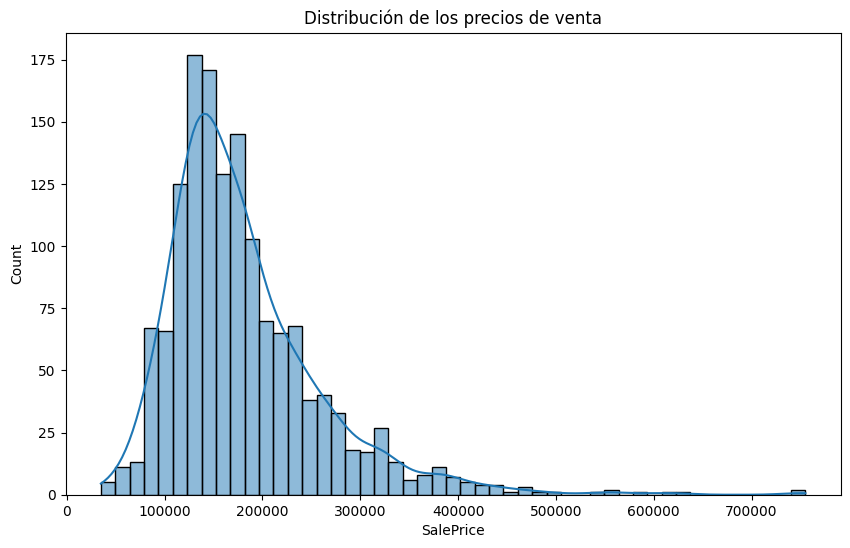

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de los precios de venta')
plt.show()

In [4]:
numeric_features = df.select_dtypes(include=[int, float])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

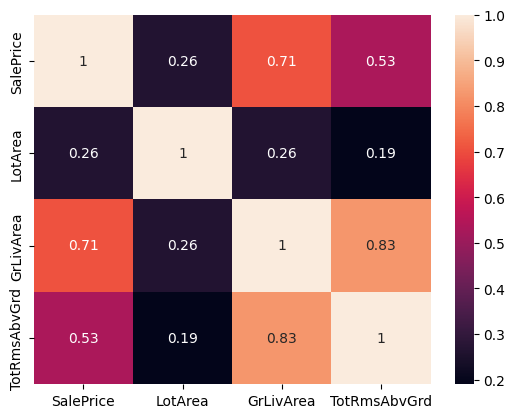

In [5]:
nume = ['LotArea', 'GrLivArea', 'TotRmsAbvGrd']
matriz_corr = df[['SalePrice']+nume].corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

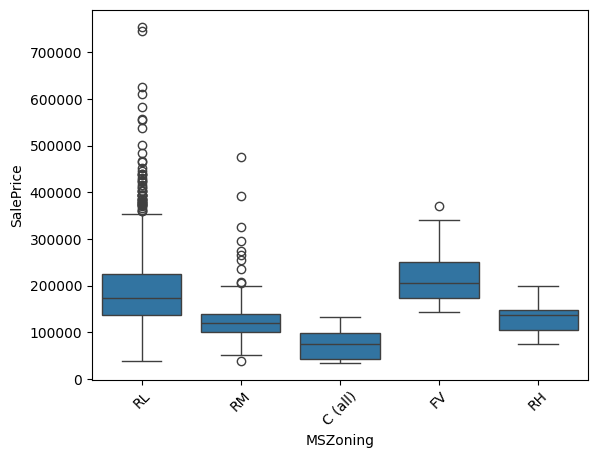

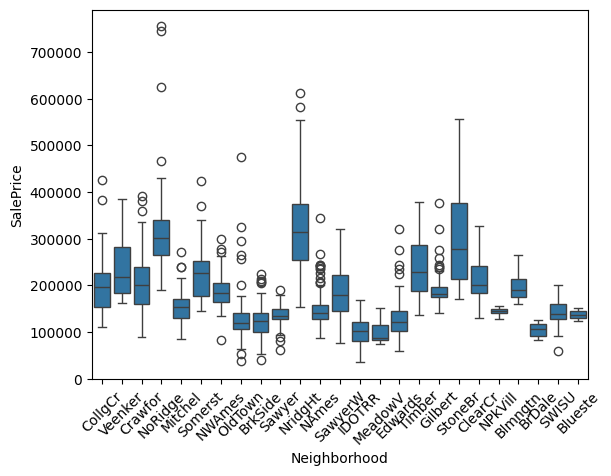

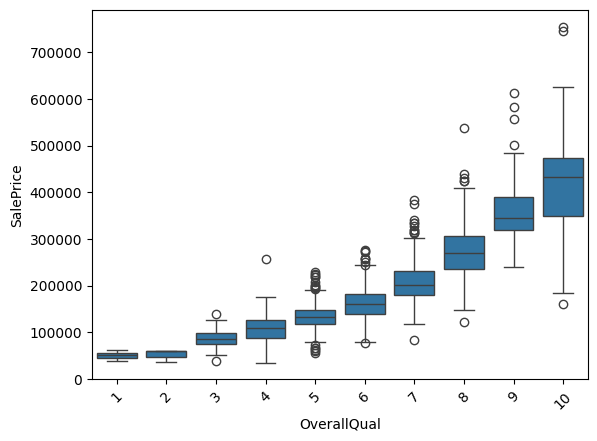

In [6]:
cate = ['MSZoning', 'Neighborhood', 'OverallQual']
for i in cate:
    sns.boxplot(x=i, y='SalePrice', data=df)
    plt.xticks(rotation=45)
    plt.show()


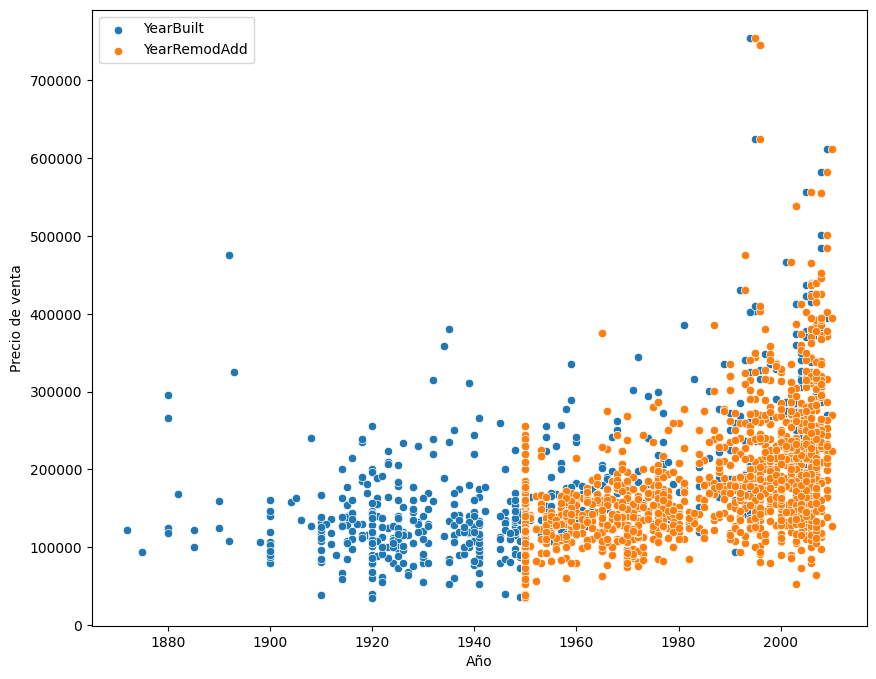

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df)
plt.legend(['YearBuilt', 'YearRemodAdd'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.show()

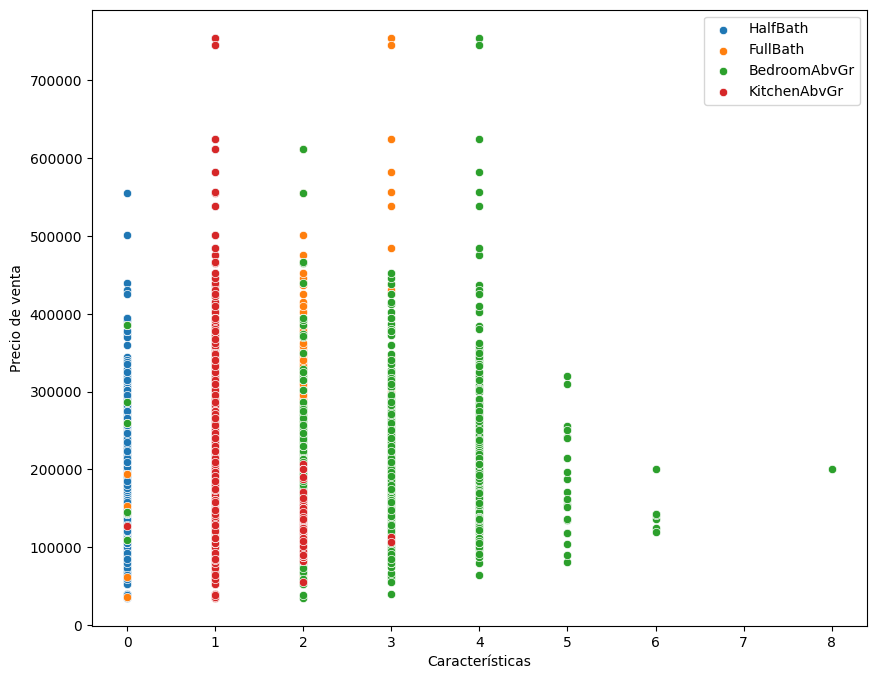

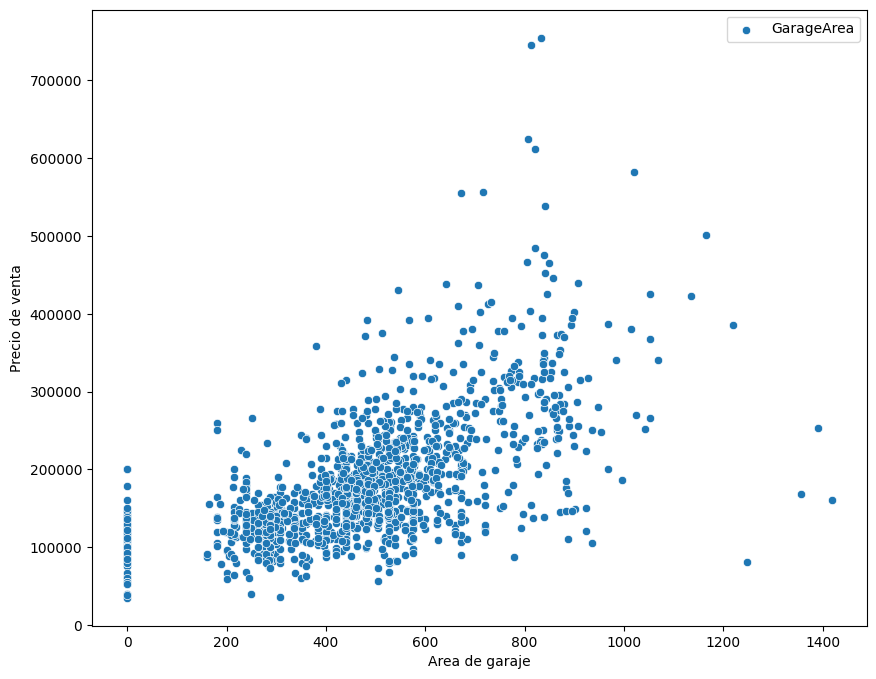

In [8]:
corre = np.corrcoef(df['HalfBath'], df['SalePrice'])
corre2 = np.corrcoef(df['FullBath'], df['SalePrice'])
corre3 = np.corrcoef(df['BedroomAbvGr'], df['SalePrice'])
corre4 = np.corrcoef(df['KitchenAbvGr'], df['SalePrice'])
corre5 = np.corrcoef(df['GarageCars'], df['SalePrice'])
corre6 = np.corrcoef(df['GarageArea'], df['SalePrice'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='HalfBath', y='SalePrice', data=df)
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df)
sns.scatterplot(x='KitchenAbvGr', y='SalePrice', data=df)
plt.legend(['HalfBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr'])
plt.xlabel('Características')
plt.ylabel('Precio de venta')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.legend(['GarageArea'])
plt.xlabel('Area de garaje')
plt.ylabel('Precio de venta')
plt.show()


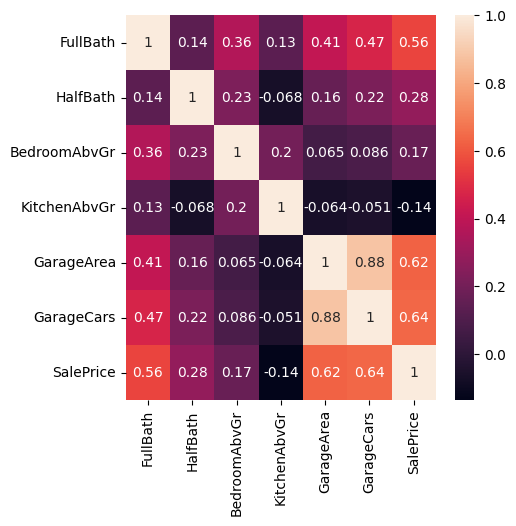

In [9]:
matr= df[['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'GarageCars' ,'SalePrice']].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(matr, annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
carac=['MSSubClass',  'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea']
df[carac] = scal.fit_transform(df[carac])
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.073375,RL,-0.208034,-0.207142,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,-0.872563,RL,0.409895,-0.091886,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,0.073375,RL,-0.084449,0.073480,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0.309859,RL,-0.414011,-0.096897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,0.073375,RL,0.574676,0.375148,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
scaled = scal.fit_transform(df[carac])
scaled = pd.DataFrame(scaled, columns=carac)
scaled['SalePrice'] = df['SalePrice']
scaled = scaled.dropna()
scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,SalePrice
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,-0.459303,0.370333,0.789741,1.227585,0.163779,-0.211454,0.311725,0.351000,208500
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,0.466465,-0.482512,0.789741,-0.761621,0.163779,-0.211454,0.311725,-0.060731,181500
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,-0.313369,0.515013,0.789741,1.227585,0.163779,-0.211454,0.311725,0.631726,223500
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.687324,0.383659,-1.026041,-0.761621,0.163779,-0.211454,1.650307,0.790804,140000
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.199680,1.299326,0.789741,1.227585,1.390023,-0.211454,1.650307,1.698485,250000


In [12]:
cara = df['SalePrice'].quantile(0.66)
bara = df['SalePrice'].quantile(0.33)
def price(x):
    if x >= cara:
        return 'High'
    elif x <= bara:
        return 'Low'
    else:
        return 'Medium'
df['PriceCategory'] = df['SalePrice'].apply(price)
scaled['PriceCategory'] = df['PriceCategory']
print(df[['SalePrice','PriceCategory']].sample(15))

      SalePrice PriceCategory
23       129900           Low
925      175000        Medium
1151     149900        Medium
1332     100000           Low
306      225000          High
899      135000           Low
800      200000          High
295      142500        Medium
1204     153500        Medium
394      109000           Low
1115     318000          High
16       149000        Medium
1092     136500           Low
597      194201          High
1255     127500           Low


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
x = scaled.drop(['SalePrice', 'PriceCategory'], axis=1)
y = scaled['PriceCategory']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
imputr = SimpleImputer(strategy='mean')
Ex = imputr.fit_transform(x)
labelE = LabelEncoder()
yE = labelE.fit_transform(y)


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
p=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']}, {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001]}, {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'gamma': [0.1, 0.01, 0.001] ,'degree': [2, 3, 4]}]
gs = GridSearchCV(svm, p, cv=5,scoring='accuracy')
gs.fit(X_train, y_train)
r=gs.cv_results_
for i in range(len(r['params'])):
    print(r['params'][i], 'accuracy:', r['mean_test_score'][i])

{'C': 0.1, 'kernel': 'linear'} accuracy: 0.8354166666666668
{'C': 1, 'kernel': 'linear'} accuracy: 0.8395833333333332
{'C': 10, 'kernel': 'linear'} accuracy: 0.8375
{'C': 100, 'kernel': 'linear'} accuracy: 0.8354166666666666
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.7958333333333333
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.7947916666666667
{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'} accuracy: 0.525
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.8354166666666666
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.834375
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} accuracy: 0.7947916666666667
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.821875
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.8354166666666666
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} accuracy: 0.8270833333333334
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.80625
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.8479166666666668
{'C': 100, 'gamma': 0.001, 'kernel': 

In [15]:
from sklearn.metrics import accuracy_score
print('Mejores parámetros:', gs.best_params_)
print('Mejor score:', gs.best_score_)
print('Mejor estimador:', gs.best_estimator_)
y_pred = gs.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Mejores parámetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor score: 0.8479166666666668
Mejor estimador: SVC(C=100, gamma=0.01)
Accuracy: 0.8340248962655602


In [16]:
from sklearn.metrics import confusion_matrix
matriz = gs.cv_results_
for i in range(len(matriz['params'])):
    print(matriz['params'][i], 'accuracy:', matriz['mean_test_score'][i])
    md=gs.best_estimator_.set_params(**matriz['params'][i])
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)
    print('Matriz de confusión:')
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    

{'C': 0.1, 'kernel': 'linear'} accuracy: 0.8354166666666668
Matriz de confusión:
[[83  0 15]
 [ 0 71  4]
 [ 7 17 44]]
Accuracy: 0.8215767634854771
{'C': 1, 'kernel': 'linear'} accuracy: 0.8395833333333332
Matriz de confusión:
[[84  0 14]
 [ 0 69  6]
 [ 7 14 47]]
Accuracy: 0.8298755186721992
{'C': 10, 'kernel': 'linear'} accuracy: 0.8375
Matriz de confusión:
[[87  0 11]
 [ 0 69  6]
 [ 7 13 48]]
Accuracy: 0.8464730290456431
{'C': 100, 'kernel': 'linear'} accuracy: 0.8354166666666666
Matriz de confusión:
[[87  0 11]
 [ 0 69  6]
 [ 7 13 48]]
Accuracy: 0.8464730290456431
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} accuracy: 0.7958333333333333
Matriz de confusión:
[[77  8 13]
 [ 0 73  2]
 [ 7 30 31]]
Accuracy: 0.7510373443983402
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.7947916666666667
Matriz de confusión:
[[73  3 22]
 [ 0 72  3]
 [ 9 26 33]]
Accuracy: 0.7385892116182573
{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'} accuracy: 0.525
Matriz de confusión:
[[76 22  0]
 [ 0 75  0]
 [ 8 

In [17]:
from sklearn.metrics import classification_report

report = gs.cv_results_
for i in range(len(report['params'])):
    print(report['params'][i], 'accuracy:', report['mean_test_score'][i])
    md = gs.best_estimator_.set_params(**report['params'][i])
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)
    print('Classification report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

{'C': 0.1, 'kernel': 'linear'} accuracy: 0.8354166666666668
Classification report:
              precision    recall  f1-score   support

        High       0.92      0.85      0.88        98
         Low       0.81      0.95      0.87        75
      Medium       0.70      0.65      0.67        68

    accuracy                           0.82       241
   macro avg       0.81      0.81      0.81       241
weighted avg       0.82      0.82      0.82       241

Accuracy: 0.8215767634854771
{'C': 1, 'kernel': 'linear'} accuracy: 0.8395833333333332
Classification report:
              precision    recall  f1-score   support

        High       0.92      0.86      0.89        98
         Low       0.83      0.92      0.87        75
      Medium       0.70      0.69      0.70        68

    accuracy                           0.83       241
   macro avg       0.82      0.82      0.82       241
weighted avg       0.83      0.83      0.83       241

Accuracy: 0.8298755186721992
{'C': 10, 'kerne

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification report:
              precision    recall  f1-score   support

        High       0.92      0.85      0.88        98
         Low       0.79      0.92      0.85        75
      Medium       0.69      0.65      0.67        68

    accuracy                           0.81       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.82      0.81      0.81       241

Accuracy: 0.8132780082987552
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} accuracy: 0.834375
Classification report:
              precision    recall  f1-score   support

        High       0.91      0.85      0.88        98
         Low       0.76      0.96      0.85        75
      Medium       0.69      0.56      0.62        68

    accuracy                           0.80       241
   macro avg       0.79      0.79      0.78       241
weighted avg       0.80      0.80      0.80       241

Accuracy: 0.8008298755186722
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} accuracy: 0.7947916666666667
Cla

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        98
         Low       0.31      1.00      0.47        75
      Medium       0.00      0.00      0.00        68

    accuracy                           0.31       241
   macro avg       0.10      0.33      0.16       241
weighted avg       0.10      0.31      0.15       241

Accuracy: 0.3112033195020747
{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'} accuracy: 0.36875
Classification report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        98
         Low       0.31      1.00      0.47        75
      Medium       0.00      0.00      0.00        68

    accuracy                           0.31       241
   macro avg       0.10      0.33      0.16       241
weighted avg       0.10      0.31      0.15       241

Accuracy: 0.3112033195020747
{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'} accuracy: 0.7208333333333

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification report:
              precision    recall  f1-score   support

        High       1.00      0.13      0.23        98
         Low       0.33      1.00      0.50        75
      Medium       0.00      0.00      0.00        68

    accuracy                           0.37       241
   macro avg       0.44      0.38      0.24       241
weighted avg       0.51      0.37      0.25       241

Accuracy: 0.3651452282157676
{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'} accuracy: 0.36875
Classification report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        98
         Low       0.31      1.00      0.47        75
      Medium       0.00      0.00      0.00        68

    accuracy                           0.31       241
   macro avg       0.10      0.33      0.16       241
weighted avg       0.10      0.31      0.15       241

Accuracy: 0.3112033195020747
{'C': 1, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'} accura

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification report:
              precision    recall  f1-score   support

        High       0.81      0.81      0.81        98
         Low       0.78      0.80      0.79        75
      Medium       0.65      0.63      0.64        68

    accuracy                           0.76       241
   macro avg       0.75      0.75      0.75       241
weighted avg       0.75      0.76      0.75       241

Accuracy: 0.7551867219917012
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'} accuracy: 0.6666666666666667
Classification report:
              precision    recall  f1-score   support

        High       0.84      0.52      0.64        98
         Low       0.81      0.68      0.74        75
      Medium       0.46      0.79      0.58        68

    accuracy                           0.65       241
   macro avg       0.70      0.66      0.65       241
weighted avg       0.72      0.65      0.66       241

Accuracy: 0.6473029045643154
{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification report:
              precision    recall  f1-score   support

        High       0.85      0.84      0.84        98
         Low       0.79      0.83      0.81        75
      Medium       0.71      0.69      0.70        68

    accuracy                           0.79       241
   macro avg       0.78      0.78      0.78       241
weighted avg       0.79      0.79      0.79       241

Accuracy: 0.7925311203319502
{'C': 10, 'degree': 4, 'gamma': 0.01, 'kernel': 'poly'} accuracy: 0.37083333333333335
Classification report:
              precision    recall  f1-score   support

        High       1.00      0.04      0.08        98
         Low       0.32      1.00      0.48        75
      Medium       0.00      0.00      0.00        68

    accuracy                           0.33       241
   macro avg       0.44      0.35      0.19       241
weighted avg       0.51      0.33      0.18       241

Accuracy: 0.3278008298755187
{'C': 10, 'degree': 4, 'gamma': 0.001, 'kernel':

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Classification report:
              precision    recall  f1-score   support

        High       0.81      0.77      0.79        98
         Low       0.74      0.76      0.75        75
      Medium       0.59      0.62      0.60        68

    accuracy                           0.72       241
   macro avg       0.71      0.71      0.71       241
weighted avg       0.73      0.72      0.72       241

Accuracy: 0.7219917012448133
{'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'} accuracy: 0.784375
Classification report:
              precision    recall  f1-score   support

        High       0.88      0.81      0.84        98
         Low       0.78      0.83      0.81        75
      Medium       0.64      0.68      0.66        68

    accuracy                           0.78       241
   macro avg       0.77      0.77      0.77       241
weighted avg       0.78      0.78      0.78       241

Accuracy: 0.7759336099585062
{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'} 

c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [18]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
report = classification_report(y_test, y_pred)

print('Classification report:')
print(report)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Accuracy train:', accuracy_score(y_train, y_train_pred))


Classification report:
              precision    recall  f1-score   support

        High       0.90      0.87      0.89        98
         Low       0.78      0.92      0.85        75
      Medium       0.69      0.60      0.65        68

    accuracy                           0.81       241
   macro avg       0.79      0.80      0.79       241
weighted avg       0.81      0.81      0.81       241

Accuracy: 0.8091286307053942
Accuracy train: 0.8833333333333333
